In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv("Preprocessed Dataset.csv")
dataset.head()

,alarm_id,customer_id,hostname,fault_severity,device_contract_level,status,created_at,fault_description,file_name,impact,...,features,fingerprint,hw,last_reset,product_family,product_type,reset_reason,sw,sw_type_y,sw_version
0,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS SNMP_Trap_memory Connection_and_Syst...,17_1 CAT9K_IOSXE SYSTEM IOS_XE 17_1_1 Cisco_Ca...,Cisco_Catalyst_9600_Series_Switches C9606R Cat...,2021_01_13T22:23:27,Cisco_Catalyst_9600_Series_Switches,Switches,PowerOn,17_1 CAT9K_IOSXE SYSTEM IOS_XE 17_1_1,IOS_XE,17_1_1
1,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS Connection_and_System_Banners IKE_No...,16_12 CAT9K_IOSXE SYSTEM IOS_XE 16_12_4 Cataly...,Catalyst_9K_Series_Power_Supplies C9600_PWR_2K...,2020_10_13T14:21:48,Cisco_Catalyst_9600_Series_Switches,Switches,Critical_process_stack_mgr_fault_on_rp_0_0__rc...,16_12 CAT9K_IOSXE SYSTEM IOS_XE 16_12_4,IOS_XE,16_12_4
2,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS SNMP_Trap_memory QoS_Infrastructure_...,17_3 CAT9K_IOSXE SYSTEM IOS_XE 17_3_4 Transcei...,Transceiver_Modules GLC_SX_MMD Transceiver_Mod...,2022_03_04T23:23:45,Cisco_Catalyst_9600_Series_Switches,Switches,ISSU,17_3 CAT9K_IOSXE SYSTEM IOS_XE 17_3_4,IOS_XE,17_3_4
3,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS IOS_Spanning_Tree_Protocol_STP Conne...,16_12 CAT9K_IOSXE SYSTEM IOS_XE 16_12_4 Transc...,Transceiver_Modules SFP_10G_LR_S Catalyst_9K_S...,NaN,Cisco_Catalyst_9600_Series_Switches,Switches,NaN,16_12 CAT9K_IOSXE SYSTEM IOS_XE 16_12_4,IOS_XE,16_12_4
4,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS SNMP_Trap_memory Connection_and_Syst...,17_3 CAT9K_IOSXE SYSTEM IOS_XE 17_3_3 Transcei...,Transceiver_Modules SFP_10G_LRM Transceiver_Mo...,2021_06_24T00:03:01,Cisco_Catalyst_9600_Series_Switches,Switches,Image_Install,17_3 CAT9K_IOSXE SYSTEM IOS_XE 17_3_3,IOS_XE,17_3_3


In [3]:
dataset.shape

(356, 42)

In [4]:
encoded_dataFrame = pd.DataFrame()
 
label_encoder = sklearn.preprocessing.LabelEncoder() 
for column in dataset.columns :
    if column != 'crashed':
        encoded_dataFrame[column] = label_encoder.fit_transform(dataset[column])
        pickle.dump(label_encoder, open(column+'_LabelEncoder.pkl', 'wb'))
encoded_dataFrame['crashed'] = dataset['crashed']
encoded_dataFrame

,alarm_id,customer_id,hostname,fault_severity,device_contract_level,status,created_at,fault_description,file_name,impact,...,fingerprint,hw,last_reset,product_family,product_type,reset_reason,sw,sw_type_y,sw_version,crashed
0,0,0,2,0,0,0,0,0,0,1,...,77,73,21,1,0,35,18,0,17,0
1,0,0,2,0,0,0,0,0,0,1,...,23,47,14,1,0,11,6,0,6,1
2,0,0,2,0,0,0,0,0,0,1,...,110,90,88,1,0,31,23,0,22,0
3,0,0,2,0,0,0,0,0,0,1,...,30,109,102,1,0,38,6,0,6,0
4,0,0,2,0,0,0,0,0,0,1,...,91,105,36,1,0,32,22,0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,5,0,0,0,0,0,5,1,5,0,...,3,54,7,0,0,35,1,0,1,0
352,5,0,0,0,0,0,5,1,5,0,...,12,1,102,0,0,35,5,0,5,0
353,5,0,0,0,0,0,5,1,5,0,...,24,70,37,0,0,32,6,0,6,0
354,5,0,0,0,0,0,5,1,5,0,...,48,25,1,0,0,35,13,0,12,0


In [5]:
encoded_dataFrame.iloc[0]

alarm_id                  0
customer_id               0
hostname                  2
fault_severity            0
device_contract_level     0
status                    0
created_at                0
fault_description         0
file_name                 0
impact                    1
mgmt_system_addr          0
mgmt_system_id            0
mgmt_system_type          0
remediation               2
syslog_msg                4
tac_severity              0
afm_cust_id_fk            0
prod_obj_id_fk            0
managed_ne_id             1
product_id                1
sw_type_x                 0
serial_number             1
cli_status                0
solution_id               0
usecase_id                0
signature_uuid            0
primekey                 50
i_d                      50
cpy_key                  41
device_id                78
device_type               0
features                 55
fingerprint              77
hw                       73
last_reset               21
product_family      

In [6]:
correlation_dataFrame = encoded_dataFrame.corr()
correlation_dataFrame

,alarm_id,customer_id,hostname,fault_severity,device_contract_level,status,created_at,fault_description,file_name,impact,...,fingerprint,hw,last_reset,product_family,product_type,reset_reason,sw,sw_type_y,sw_version,crashed
alarm_id,1.000000,NaN,-0.484062,NaN,NaN,NaN,1.000000,2.271985e-01,1.000000,-0.270787,...,-1.207726e-01,-2.434602e-01,-2.399849e-02,-4.274306e-01,NaN,-1.742530e-01,-1.159337e-01,NaN,-1.243796e-01,2.329692e-01
customer_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hostname,-0.484062,NaN,1.000000,NaN,NaN,NaN,-0.484062,-4.693581e-01,-0.484062,0.559406,...,2.494983e-01,5.029524e-01,4.957730e-02,8.830079e-01,NaN,3.599807e-01,2.395017e-01,NaN,2.569497e-01,-4.812797e-01
fault_severity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_contract_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,1.000000,NaN,-0.484062,NaN,NaN,NaN,1.000000,2.271985e-01,1.000000,-0.270787,...,-1.207726e-01,-2.434602e-01,-2.399849e-02,-4.274306e-01,NaN,-1.742530e-01,-1.159337e-01,NaN,-1.243796e-01,2.329692e-01
fault_description,0.227198,NaN,-0.469358,NaN,NaN,NaN,0.227198,1.000000e+00,0.227198,0.469358,...,-6.897481e-17,-1.833387e-16,-9.067012e-17,-1.765949e-16,NaN,-1.619973e-16,-5.051180e-16,NaN,-2.702970e-16,8.081714e-17
file_name,1.000000,NaN,-0.484062,NaN,NaN,NaN,1.000000,2.271985e-01,1.000000,-0.270787,...,-1.207726e-01,-2.434602e-01,-2.399849e-02,-4.274306e-01,NaN,-1.742530e-01,-1.159337e-01,NaN,-1.243796e-01,2.329692e-01
impact,-0.270787,NaN,0.559406,NaN,NaN,NaN,-0.270787,4.693581e-01,-0.270787,1.000000,...,2.494983e-01,5.029524e-01,4.957730e-02,8.830079e-01,NaN,3.599807e-01,2.395017e-01,NaN,2.569497e-01,-4.812797e-01


In [7]:
correlation_dataFrame['crashed']

alarm_id                 2.329692e-01
customer_id                       NaN
hostname                -4.812797e-01
fault_severity                    NaN
device_contract_level             NaN
status                            NaN
created_at               2.329692e-01
fault_description        8.081714e-17
file_name                2.329692e-01
impact                  -4.812797e-01
mgmt_system_addr                  NaN
mgmt_system_id                    NaN
mgmt_system_type                  NaN
remediation             -4.812797e-01
syslog_msg              -4.608195e-01
tac_severity                      NaN
afm_cust_id_fk                    NaN
prod_obj_id_fk           5.450457e-01
managed_ne_id           -4.812797e-01
product_id              -5.450457e-01
sw_type_x                         NaN
serial_number           -4.812797e-01
cli_status                        NaN
solution_id                       NaN
usecase_id               5.450457e-01
signature_uuid           8.081714e-17
primekey    

In [8]:
crashed_correlated_dataFrame = pd.DataFrame(correlation_dataFrame['crashed'])
crashed_correlated_dataFrame.dropna(inplace = True)
crashed_correlated_dataFrame

,crashed
alarm_id,2.329692e-01
hostname,-4.812797e-01
created_at,2.329692e-01
fault_description,8.081714e-17
file_name,2.329692e-01
impact,-4.812797e-01
remediation,-4.812797e-01
syslog_msg,-4.608195e-01
prod_obj_id_fk,5.450457e-01
managed_ne_id,-4.812797e-01


In [9]:
crashed_correlated_dict = dict()
columns_to_keep = list()

for index in range(crashed_correlated_dataFrame.shape[0]):
    key = crashed_correlated_dataFrame.iloc[index].name
    columns_to_keep.append(key)
    if key != 'crashed':
        crashed_correlated_dict[crashed_correlated_dataFrame.iloc[index].name] = crashed_correlated_dataFrame['crashed'].iloc[index]
        
crashed_correlated_dict_in_descending_order = dict(sorted(crashed_correlated_dict.items(), key = operator.itemgetter(1), reverse = True))
crashed_correlated_dict_in_descending_order

{'prod_obj_id_fk': 0.5450457022868392,
 'usecase_id': 0.5450457022868392,
 'primekey': 0.23696007171161598,
 'i_d': 0.23696007171161598,
 'alarm_id': 0.23296923529592925,
 'created_at': 0.23296923529592925,
 'file_name': 0.23296923529592925,
 'device_id': 0.21221688798345903,
 'last_reset': 0.04321553545356994,
 'fault_description': 8.08171360645626e-17,
 'signature_uuid': 8.08171360645626e-17,
 'sw': -0.10233972115429586,
 'fingerprint': -0.10532355506208228,
 'sw_version': -0.11736502533065689,
 'device_type': -0.2584837753976487,
 'cpy_key': -0.34977829123034615,
 'hw': -0.3765010858031829,
 'features': -0.37722047651911417,
 'syslog_msg': -0.4608194644914447,
 'hostname': -0.48127966679325834,
 'remediation': -0.48127966679325834,
 'impact': -0.4812796667932585,
 'managed_ne_id': -0.4812796667932585,
 'serial_number': -0.4812796667932585,
 'product_id': -0.5450457022868391,
 'product_family': -0.5450457022868391,
 'reset_reason': -0.7984304207914686}

In [10]:
columns_to_keep.remove('primekey')
columns_to_keep.remove('i_d')
columns_to_keep.remove('created_at')
columns_to_keep.remove('file_name')
columns_to_keep.remove('signature_uuid')
columns_to_keep.remove('sw')
columns_to_keep.remove('hw')
columns_to_drop = dataset.columns.difference(columns_to_keep)
print("Columns to be dropped - {}".format(columns_to_drop))

Columns to be dropped - Index(['afm_cust_id_fk', 'cli_status', 'created_at', 'customer_id',
       'device_contract_level', 'fault_severity', 'file_name', 'hw', 'i_d',
       'mgmt_system_addr', 'mgmt_system_id', 'mgmt_system_type', 'primekey',
       'product_type', 'signature_uuid', 'solution_id', 'status', 'sw',
       'sw_type_x', 'sw_type_y', 'tac_severity'],
      dtype='object')


### Splitting of dataset into training and testing data

In [11]:
target_column = encoded_dataFrame['crashed']
feature_columns = encoded_dataFrame.drop(columns = columns_to_drop, axis = 1)
feature_columns = feature_columns.drop(columns = 'crashed', axis = 1)

feature_DF = pd.DataFrame(feature_columns, columns = feature_columns.columns)

feature_nparray = feature_DF.to_numpy()
target_nparray = target_column.to_numpy()

In [12]:
list(feature_columns.columns)

['alarm_id',
 'hostname',
 'fault_description',
 'impact',
 'remediation',
 'syslog_msg',
 'prod_obj_id_fk',
 'managed_ne_id',
 'product_id',
 'serial_number',
 'usecase_id',
 'cpy_key',
 'device_id',
 'device_type',
 'features',
 'fingerprint',
 'last_reset',
 'product_family',
 'reset_reason',
 'sw_version']

In [13]:
features_train, features_test, target_train, target_test = train_test_split(feature_nparray, target_nparray, test_size = 0.4, random_state = 1)

In [14]:
mean_absolute_error_models_dict = dict()
mean_squared_error_models_dict = dict()
r2_score_models_dict = dict()

### SVR

In [15]:
SVR_model = SVR(kernel='linear') 
SVR_model.fit(features_train, target_train) 
filename = 'SVR.sav'
pickle.dump(SVR_model, open(filename, 'wb'))
pickle.dump(SVR_model, open('SVR.pkl', 'wb'))

target_SVR_predicted = SVR_model.predict(features_test)
target_SVR_predicted

array([ 1.78822814e-02, -8.51582276e-02, -2.66327023e-02, -1.04097812e-01,
        1.36949393e-01,  9.17848282e-02, -9.82346925e-02,  3.58186062e-02,
       -4.73501663e-02,  9.25379066e-02,  8.65181587e-01,  8.33741483e-01,
        9.60589470e-01, -7.88748503e-02,  2.60681501e-02, -5.80939674e-02,
        2.00792550e-02,  9.69897143e-02,  1.95363656e-02,  3.93128868e-02,
       -4.68265377e-02,  8.88983154e-01, -6.23997585e-02,  8.40218013e-02,
        8.88501773e-02,  8.86674810e-02, -1.15365242e-01, -9.47036089e-02,
        4.18467977e-02,  1.10747406e-01,  1.15830132e-01,  2.79396675e-03,
       -4.55005924e-02,  8.02964698e-02,  9.58869301e-02,  1.43687370e-01,
        6.32614767e-01,  8.22508820e-02, -1.82445310e-01, -1.91260828e-01,
        1.06674661e-01, -1.99266013e-02,  4.65045374e-02, -2.08400234e-01,
       -1.42304459e-01,  1.35575913e-01,  9.52717432e-01,  1.55179262e-02,
       -2.14707773e-01,  2.20471298e-02, -1.53652726e-02,  6.35855944e-02,
       -5.35326387e-02, -

In [16]:
sklearn.preprocessing.minmax_scale(target_SVR_predicted, feature_range=(0, 1), axis=0, copy=False)

array([0.17766565, 0.10060077, 0.14437251, 0.08643569, 0.26671697,
       0.232938  , 0.09082077, 0.19108038, 0.12887774, 0.23350124,
       0.81136811, 0.78785379, 0.88272449, 0.10530016, 0.18378793,
       0.12084236, 0.17930879, 0.23683078, 0.17890276, 0.19369379,
       0.12926937, 0.82916951, 0.11762202, 0.22713197, 0.23074315,
       0.23060651, 0.07800868, 0.09346169, 0.19558892, 0.24712028,
       0.25092169, 0.16638097, 0.13026105, 0.22434576, 0.236006  ,
       0.27175636, 0.63742938, 0.22580748, 0.02783892, 0.02124572,
       0.24407424, 0.14938806, 0.19907248, 0.00842701, 0.05786061,
       0.26568973, 0.87683692, 0.17589733, 0.00370955, 0.18078058,
       0.15279952, 0.21184755, 0.12425382, 0.07862607, 0.72084436,
       0.89725051, 0.13163539, 0.95110279, 0.11703928, 0.1538598 ,
       0.96002768, 0.09687315, 0.21574371, 0.21591875, 0.8207425 ,
       1.        , 0.13504685, 0.01281871, 0.18482268, 0.05924509,
       0.13775727, 0.21242645, 0.0667876 , 0.08142014, 0.31851

In [17]:
probability_SVR_list = list(map(lambda n: "%.1f" %(n*100), target_SVR_predicted))
probability_SVR_list

['17.8',
 '10.1',
 '14.4',
 '8.6',
 '26.7',
 '23.3',
 '9.1',
 '19.1',
 '12.9',
 '23.4',
 '81.1',
 '78.8',
 '88.3',
 '10.5',
 '18.4',
 '12.1',
 '17.9',
 '23.7',
 '17.9',
 '19.4',
 '12.9',
 '82.9',
 '11.8',
 '22.7',
 '23.1',
 '23.1',
 '7.8',
 '9.3',
 '19.6',
 '24.7',
 '25.1',
 '16.6',
 '13.0',
 '22.4',
 '23.6',
 '27.2',
 '63.7',
 '22.6',
 '2.8',
 '2.1',
 '24.4',
 '14.9',
 '19.9',
 '0.8',
 '5.8',
 '26.6',
 '87.7',
 '17.6',
 '0.4',
 '18.1',
 '15.3',
 '21.2',
 '12.4',
 '7.9',
 '72.1',
 '89.7',
 '13.2',
 '95.1',
 '11.7',
 '15.4',
 '96.0',
 '9.7',
 '21.6',
 '21.6',
 '82.1',
 '100.0',
 '13.5',
 '1.3',
 '18.5',
 '5.9',
 '13.8',
 '21.2',
 '6.7',
 '8.1',
 '31.9',
 '0.3',
 '16.9',
 '23.0',
 '62.1',
 '12.9',
 '2.5',
 '14.9',
 '8.3',
 '86.8',
 '86.3',
 '22.5',
 '16.5',
 '18.0',
 '10.8',
 '17.2',
 '23.4',
 '1.2',
 '0.0',
 '11.0',
 '23.6',
 '97.2',
 '1.9',
 '33.9',
 '8.9',
 '87.7',
 '11.5',
 '14.2',
 '98.1',
 '14.3',
 '3.7',
 '26.1',
 '2.3',
 '9.1',
 '0.9',
 '12.7',
 '10.7',
 '97.9',
 '27.2',
 '12.0',

In [18]:
mean_absolute_error_models_dict['SVR'] = mean_absolute_error(target_test, target_SVR_predicted)
mean_squared_error_models_dict['SVR'] = mean_squared_error(target_test, target_SVR_predicted)
r2_score_models_dict['SVR'] = r2_score(target_test, target_SVR_predicted)

In [19]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['SVR']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['SVR']))
print("R-Square Error: {}".format(r2_score_models_dict['SVR']))

Mean Absolute Error: 0.17301482410137073
Mean Squared Error: 0.0460093980374659
R-Square Error: 0.6465641696212847


### Linear Regression

In [20]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(features_train, target_train)
filename = 'LinearRegression.sav'
pickle.dump(LinearRegression_model, open(filename, 'wb'))
pickle.dump(SVR_model, open('LinearRegression.pkl', 'wb'))

target_lr_predicted = LinearRegression_model.predict(features_test) 
target_lr_predicted

array([ 0.07300458, -0.07450725, -0.05366259, -0.09585756,  0.13488273,
        0.06008534, -0.0721648 , -0.0055675 , -0.10139441,  0.09615341,
        0.90314979,  0.88835087,  0.85863072, -0.05173471,  0.05434377,
       -0.00442455, -0.03405912,  0.10932091,  0.04504506,  0.00953585,
        0.00233828,  0.86838865, -0.04433221,  0.10840628,  0.11653809,
        0.05195304, -0.1026204 , -0.06061735,  0.12008201,  0.1146554 ,
        0.07595476,  0.10990626, -0.0567789 ,  0.06289192,  0.09030572,
        0.10169651,  0.54628303,  0.12950404, -0.1564856 , -0.16245498,
        0.11866951, -0.04901956,  0.07614144, -0.18530147, -0.23573537,
        0.16390441,  0.97931681, -0.03617892, -0.18575384,  0.07024206,
       -0.04689976,  0.10589773, -0.00230475, -0.15098697,  0.80551384,
        0.8172368 , -0.04510354,  1.07575272, -0.11027705, -0.08461687,
        1.08383525, -0.05849755,  0.05505546,  0.05612909,  0.86162582,
        1.15128099, -0.04298374, -0.16921781,  0.10978287, -0.20

In [21]:
sklearn.preprocessing.minmax_scale(target_lr_predicted, feature_range=(0, 1), axis=0, copy=False)

array([0.22259287, 0.11624096, 0.13126938, 0.10084799, 0.26720528,
       0.21327846, 0.1179298 , 0.1659446 , 0.09685607, 0.23928253,
       0.82110434, 0.81043474, 0.78900734, 0.13265933, 0.20913895,
       0.16676863, 0.14540294, 0.24877592, 0.20243483, 0.17683369,
       0.17164444, 0.79604254, 0.13799633, 0.2481165 , 0.25397931,
       0.2074153 , 0.09597217, 0.12625519, 0.25653438, 0.25262194,
       0.22471987, 0.24919794, 0.12902261, 0.21530193, 0.23506651,
       0.24327895, 0.56381339, 0.2633274 , 0.05713687, 0.05283311,
       0.25551601, 0.13461688, 0.22485445, 0.03636143, 0.        ,
       0.2881291 , 0.87601864, 0.14387462, 0.03603528, 0.22060117,
       0.13614519, 0.24630791, 0.16829695, 0.06110123, 0.75071156,
       0.75916348, 0.13744022, 0.94554623, 0.09045194, 0.10895221,
       0.95137351, 0.12778351, 0.20965206, 0.21042611, 0.79116672,
       1.        , 0.13896853, 0.0479573 , 0.24910898, 0.02195554,
       0.2005148 , 0.20439469, 0.0546971 , 0.09750049, 0.35870

In [22]:
probability_lr_list = list(map(lambda n: "%.1f" %(n*100), target_lr_predicted))
probability_lr_list

['22.3',
 '11.6',
 '13.1',
 '10.1',
 '26.7',
 '21.3',
 '11.8',
 '16.6',
 '9.7',
 '23.9',
 '82.1',
 '81.0',
 '78.9',
 '13.3',
 '20.9',
 '16.7',
 '14.5',
 '24.9',
 '20.2',
 '17.7',
 '17.2',
 '79.6',
 '13.8',
 '24.8',
 '25.4',
 '20.7',
 '9.6',
 '12.6',
 '25.7',
 '25.3',
 '22.5',
 '24.9',
 '12.9',
 '21.5',
 '23.5',
 '24.3',
 '56.4',
 '26.3',
 '5.7',
 '5.3',
 '25.6',
 '13.5',
 '22.5',
 '3.6',
 '0.0',
 '28.8',
 '87.6',
 '14.4',
 '3.6',
 '22.1',
 '13.6',
 '24.6',
 '16.8',
 '6.1',
 '75.1',
 '75.9',
 '13.7',
 '94.6',
 '9.0',
 '10.9',
 '95.1',
 '12.8',
 '21.0',
 '21.0',
 '79.1',
 '100.0',
 '13.9',
 '4.8',
 '24.9',
 '2.2',
 '20.1',
 '20.4',
 '5.5',
 '9.8',
 '35.9',
 '3.3',
 '21.8',
 '23.8',
 '66.6',
 '15.9',
 '5.4',
 '10.6',
 '13.2',
 '85.6',
 '86.7',
 '20.8',
 '22.9',
 '20.8',
 '15.6',
 '20.3',
 '26.8',
 '3.8',
 '3.1',
 '9.6',
 '25.1',
 '87.3',
 '5.2',
 '37.3',
 '11.0',
 '87.5',
 '10.0',
 '17.5',
 '87.7',
 '14.4',
 '0.4',
 '26.8',
 '5.4',
 '13.7',
 '3.9',
 '12.7',
 '9.5',
 '96.5',
 '27.1',
 '9.2

In [23]:
mean_absolute_error_models_dict['Linear Regression'] = mean_absolute_error(target_test, target_lr_predicted)
mean_squared_error_models_dict['Linear Regression'] = mean_squared_error(target_test, target_lr_predicted)
r2_score_models_dict['Linear Regression'] = r2_score(target_test, target_lr_predicted)

In [24]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Linear Regression']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Linear Regression']))
print("R-Square Error: {}".format(r2_score_models_dict['Linear Regression']))

Mean Absolute Error: 0.18398065329577673
Mean Squared Error: 0.046880153186088507
R-Square Error: 0.6398751868886837


### Gradient Boosting Regressor

In [25]:
GradientBoostingRegressor_model = GradientBoostingRegressor(random_state = 1)
GradientBoostingRegressor_model.fit(features_train, target_train)
filename = 'GradientBoostingRegressor.sav'
pickle.dump(GradientBoostingRegressor_model, open(filename, 'wb'))
pickle.dump(SVR_model, open('GradientBoostingRegressor.pkl', 'wb'))

target_gbr_predicted = GradientBoostingRegressor_model.predict(features_test)
target_gbr_predicted

array([5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 9.99979175e-01, 9.99979175e-01,
       9.99979175e-01, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 9.99979175e-01, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       9.99979175e-01, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 9.99979175e-01, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 9.99979175e-01, 5.73626455e-06,
      

In [26]:
mean_absolute_error_models_dict['Gradient Boosting Regression'] = mean_absolute_error(target_test, target_gbr_predicted)
mean_squared_error_models_dict['Gradient Boosting Regression'] = mean_squared_error(target_test, target_gbr_predicted)
r2_score_models_dict['Gradient Boosting Regression'] = r2_score(target_test, target_gbr_predicted)

In [27]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Gradient Boosting Regression']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Gradient Boosting Regression']))
print("R-Square Error: {}".format(r2_score_models_dict['Gradient Boosting Regression']))

Mean Absolute Error: 8.05762913165865e-06
Mean Squared Error: 9.4563421627233e-11
R-Square Error: 0.999999999273581


### RandomForest Regression

In [28]:
RandomForestRegressor_model = RandomForestRegressor(random_state = 1)
RandomForestRegressor_model.fit(features_train, target_train)
filename = 'RandomForestRegressor.sav'
pickle.dump(RandomForestRegressor_model, open(filename, 'wb'))
pickle.dump(SVR_model, open('RandomForestRegressor.pkl', 'wb'))

target_rbr_predicted = RandomForestRegressor_model.predict(features_test)
target_rbr_predicted

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       1.  , 0.86, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.86,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       0.2 , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.86, 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.86, 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 0.86, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 1.  , 0.  , 0.  , 0.16, 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ])

In [29]:
mean_absolute_error_models_dict['Random Forest Regression'] = mean_absolute_error(target_test, target_rbr_predicted)
mean_squared_error_models_dict['Random Forest Regression'] = mean_squared_error(target_test, target_rbr_predicted)
r2_score_models_dict['Random Forest Regression'] = r2_score(target_test, target_rbr_predicted)

In [30]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Random Forest Regression']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Random Forest Regression']))
print("R-Square Error: {}".format(r2_score_models_dict['Random Forest Regression']))

Mean Absolute Error: 0.007832167832167832
Mean Squared Error: 0.0011692307692307694
R-Square Error: 0.9910181818181818


### Voting Regressor (GradientBoostRegressor, RandomForestRegressor, LinearRegression)¶ 

In [31]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
VotingRegressor_model = VotingRegressor(estimators=[('gbr', reg1), ('rfr', reg2), ('lr', reg3)])
VotingRegressor_model.fit(features_train, target_train)

filename = 'VotingRegressor-GBR-RFR-LR.sav'
pickle.dump(VotingRegressor_model, open(filename, 'wb'))
pickle.dump(VotingRegressor_model, open('VotingRegressor-GBR-RFR-LR.pkl', 'wb'))

In [32]:
target_vreg_predicted = VotingRegressor_model.predict(features_test)
target_vreg_predicted

array([ 2.43367727e-02, -2.48338377e-02, -1.78856185e-02, -3.19506085e-02,
        4.49628225e-02,  2.00303597e-02, -2.40530216e-02, -1.85391975e-03,
       -3.37962253e-02,  3.20530503e-02,  9.67709654e-01,  9.62776683e-01,
        9.06203297e-01, -1.72429926e-02,  1.81165032e-02, -1.47293875e-03,
       -1.13511264e-02,  3.64422142e-02,  1.50169307e-02,  3.18053027e-03,
        7.81339541e-04,  9.09455943e-01, -1.47754909e-02,  3.61373373e-02,
        3.88479413e-02,  1.73195916e-02, -3.42048868e-02, -2.02038712e-02,
        4.00292475e-02,  3.82203779e-02,  2.53201656e-02,  3.66373309e-02,
       -1.89243884e-02,  2.09658867e-02,  3.01038193e-02,  3.39007491e-02,
        8.28754069e-01,  4.31699268e-02, -5.21599536e-02, -5.41497465e-02,
        3.95584157e-02, -1.63379406e-02,  2.53823905e-02, -6.17652431e-02,
       -7.85765443e-02,  5.46367154e-02,  9.93098661e-01, -1.20577267e-02,
       -6.19160353e-02,  2.34159324e-02, -1.56313402e-02,  3.53011562e-02,
       -7.66338406e-04, -

In [33]:
mean_absolute_error_models_dict['Voting Regressor(GBR, RFR, LR)'] = mean_absolute_error(target_test, target_vreg_predicted)
mean_squared_error_models_dict['Voting Regressor(GBR, RFR, LR)'] = mean_squared_error(target_test, target_vreg_predicted)
r2_score_models_dict['Voting Regressor(GBR, RFR, LR)'] = r2_score(target_test, target_vreg_predicted)

In [34]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Voting Regressor(GBR, RFR, LR)']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Voting Regressor(GBR, RFR, LR)']))
print("R-Square Error: {}".format(r2_score_models_dict['Voting Regressor(GBR, RFR, LR)']))

Mean Absolute Error: 0.04096234011334914
Mean Squared Error: 0.0037639483524603327
R-Square Error: 0.9710860331106457


### Voting Regressor (GradientBoostRegressor, RandomForestRegressor, LinearRegression, SVR)

In [35]:
reg1 = GradientBoostingRegressor(random_state = 1)
reg2 = RandomForestRegressor(random_state = 1)
reg3 = LinearRegression()
reg4 = SVR(kernel = 'linear')
ereg = VotingRegressor(estimators=[('gbr', reg1), ('rfr', reg2), ('lr', reg3), ('svr', reg4)])
ereg.fit(features_train, target_train)

filename = 'VotingRegressor-GBR-RFR-LR-SVR.sav'
pickle.dump(ereg, open(filename, 'wb'))
pickle.dump(ereg, open('VotingRegressor-GBR-RFR-LR-SVR.pkl', 'wb'))

In [36]:
target_ereg_predicted = ereg.predict(features_test)
target_ereg_predicted

array([ 0.02272315, -0.03991494, -0.02007239, -0.04998741,  0.06795947,
        0.03796898, -0.04259844,  0.00756421, -0.03718471,  0.04717426,
        0.94207764,  0.93051788,  0.91979984, -0.03265096,  0.02010441,
       -0.0156282 , -0.00349353,  0.05157909,  0.01614679,  0.01221362,
       -0.01112063,  0.90433775, -0.02668156,  0.04810845,  0.0513485 ,
        0.03515656, -0.05449498, -0.03882881,  0.04048364,  0.05635213,
        0.04794766,  0.02817649, -0.02556844,  0.03579853,  0.0465496 ,
        0.0613474 ,  0.77971924,  0.05294017, -0.08473129, -0.08842752,
        0.05633748, -0.01723511,  0.03066293, -0.09842399, -0.09450852,
        0.07487151,  0.98300335, -0.00516381, -0.10011397,  0.02307373,
       -0.01556482,  0.04237227, -0.01395791, -0.06638025,  0.88740969,
        0.49931355, -0.02219021,  1.03193684, -0.04336256, -0.02463969,
        1.03694076, -0.03715852,  0.03096405,  0.03129097,  0.89983018,
        1.06716356, -0.02051992, -0.09293508,  0.03431007, -0.08

In [37]:
sklearn.preprocessing.minmax_scale(target_ereg_predicted, feature_range=(0, 1), axis=0, copy=False)

array([0.10738846, 0.05385598, 0.07081404, 0.04524773, 0.14604883,
       0.12041802, 0.05156258, 0.09443315, 0.05618932, 0.12828514,
       0.89309765, 0.88321832, 0.87405834, 0.06006401, 0.1051504 ,
       0.07461219, 0.08498286, 0.13204965, 0.10176809, 0.09840668,
       0.0784645 , 0.86084395, 0.06516564, 0.12908353, 0.13185258,
       0.11801444, 0.04139542, 0.05478422, 0.12256712, 0.13612884,
       0.12894611, 0.11204905, 0.06611695, 0.11856309, 0.12775128,
       0.14039796, 0.75434107, 0.13321286, 0.01555452, 0.01239561,
       0.13611631, 0.07323888, 0.11417404, 0.00385231, 0.00719859,
       0.15195608, 0.92807405, 0.08355538, 0.002408  , 0.10768807,
       0.07466635, 0.12418121, 0.07603967, 0.0312379 , 0.84637671,
       0.51469756, 0.06900409, 0.96989414, 0.05090953, 0.06691069,
       0.97417065, 0.0562117 , 0.11443139, 0.11471078, 0.85699164,
       1.        , 0.07043157, 0.0085433 , 0.117291  , 0.01410055,
       0.08944491, 0.11192573, 0.02595811, 0.0428229 , 0.18796

In [38]:
mean_absolute_error_models_dict['Voting Regressor(GBR, RFR, LR, SVR)'] = mean_absolute_error(target_test, target_ereg_predicted)
mean_squared_error_models_dict['Voting Regressor(GBR, RFR, LR, SVR)'] = mean_squared_error(target_test, target_ereg_predicted)
r2_score_models_dict['Voting Regressor(GBR, RFR, LR, SVR)'] = r2_score(target_test, target_ereg_predicted)

In [39]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Voting Regressor(GBR, RFR, LR, SVR)']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Voting Regressor(GBR, RFR, LR, SVR)']))
print("R-Square Error: {}".format(r2_score_models_dict['Voting Regressor(GBR, RFR, LR, SVR)']))

Mean Absolute Error: 0.09772611542365005
Mean Squared Error: 0.01483091063210031
R-Square Error: 0.8860716410534113


### Model Comparison using Quality Metrics

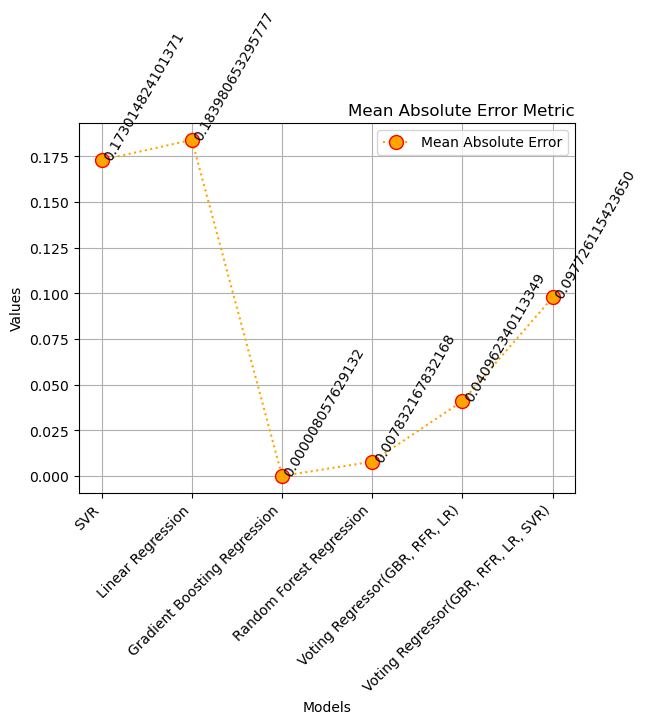

In [40]:
x = mean_absolute_error_models_dict.keys()
y = mean_absolute_error_models_dict.values()
fig, ax = plt.subplots()


ax.plot(x, y, marker = 'o', ms = 10, mec = 'r', color = 'orange', label = 'Mean Absolute Error', linestyle = ':')
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.annotate('{:.15f}'.format(yi), (xi, yi), horizontalalignment='left', verticalalignment='baseline', rotation=60)
ax.legend()
ax.grid()
plt.title('Mean Absolute Error Metric', loc='right')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Values')

plt.show()

fig.savefig('Mean Absolute Error Metric.png', bbox_inches='tight')

In [41]:
print("Mean Absolute Error of all models")
mean_absolute_error_models_dict

Mean Absolute Error of all models


{'SVR': 0.17301482410137073,
 'Linear Regression': 0.18398065329577673,
 'Gradient Boosting Regression': 8.05762913165865e-06,
 'Random Forest Regression': 0.007832167832167832,
 'Voting Regressor(GBR, RFR, LR)': 0.04096234011334914,
 'Voting Regressor(GBR, RFR, LR, SVR)': 0.09772611542365005}

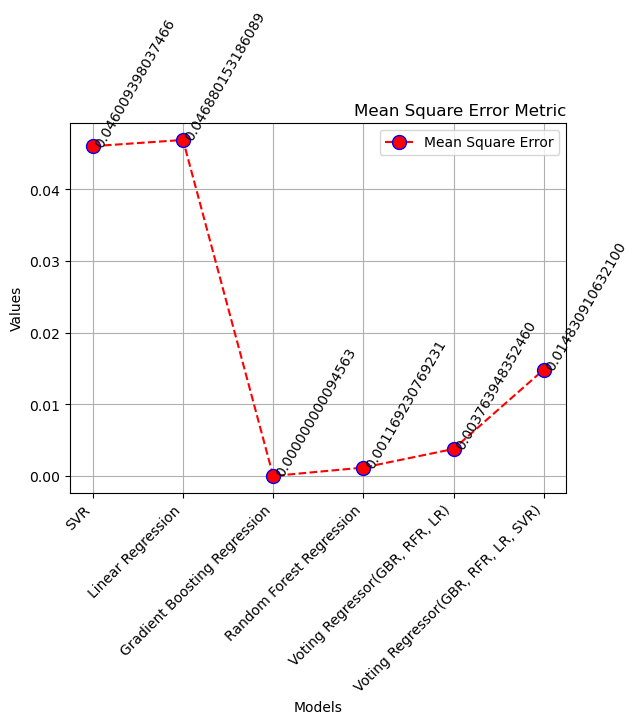

In [42]:
x = mean_squared_error_models_dict.keys()
y = mean_squared_error_models_dict.values()
fig, ax = plt.subplots()

ax.plot(x, y, marker = 'o', ms = 10, mec = 'b', color = 'r', label = 'Mean Square Error', linestyle = '--')
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.annotate('{:.15f}'.format(yi), (xi, yi), horizontalalignment='left', verticalalignment='baseline', rotation=60)
ax.legend()
ax.grid()
plt.title('Mean Square Error Metric', loc='right')
plt.xlabel('Models')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()

fig.savefig('Mean Square Error Metric.png', bbox_inches='tight')

In [43]:
print("Mean Squared Error of all models")
mean_squared_error_models_dict

Mean Squared Error of all models


{'SVR': 0.0460093980374659,
 'Linear Regression': 0.046880153186088507,
 'Gradient Boosting Regression': 9.4563421627233e-11,
 'Random Forest Regression': 0.0011692307692307694,
 'Voting Regressor(GBR, RFR, LR)': 0.0037639483524603327,
 'Voting Regressor(GBR, RFR, LR, SVR)': 0.01483091063210031}

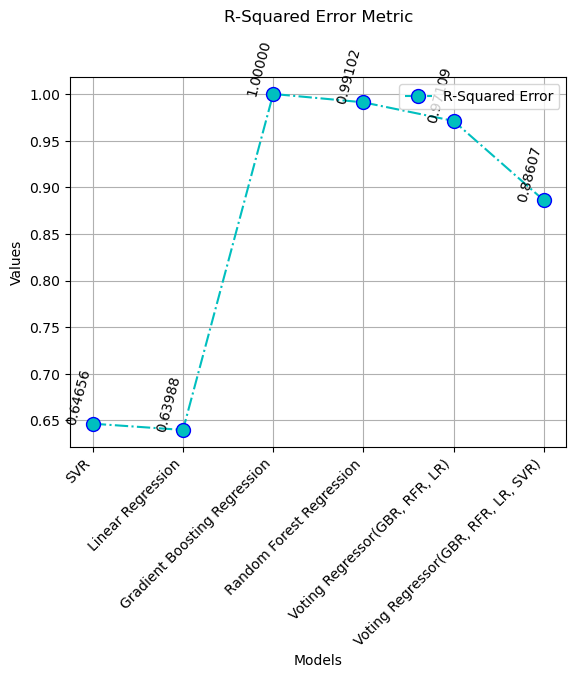

In [44]:
x = r2_score_models_dict.keys()
y = r2_score_models_dict.values()
fig, ax = plt.subplots()

ax.plot(x, y, marker = 'o', ms = 10, mec = 'b', color = 'c', label = 'R-Squared Error', linestyle = '-.')
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.annotate('{:.5f}'.format(yi), (xi, yi), ha='right', va='baseline', rotation=75)
ax.legend()
ax.grid()
plt.legend()
plt.xlabel('Models')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.title('R-Squared Error Metric', loc='center', pad=40)
plt.show()

fig.savefig('R-Square Error Metric.png', bbox_inches='tight')

In [45]:
print("R-Squared Error of all models")
r2_score_models_dict

R-Squared Error of all models


{'SVR': 0.6465641696212847,
 'Linear Regression': 0.6398751868886837,
 'Gradient Boosting Regression': 0.999999999273581,
 'Random Forest Regression': 0.9910181818181818,
 'Voting Regressor(GBR, RFR, LR)': 0.9710860331106457,
 'Voting Regressor(GBR, RFR, LR, SVR)': 0.8860716410534113}

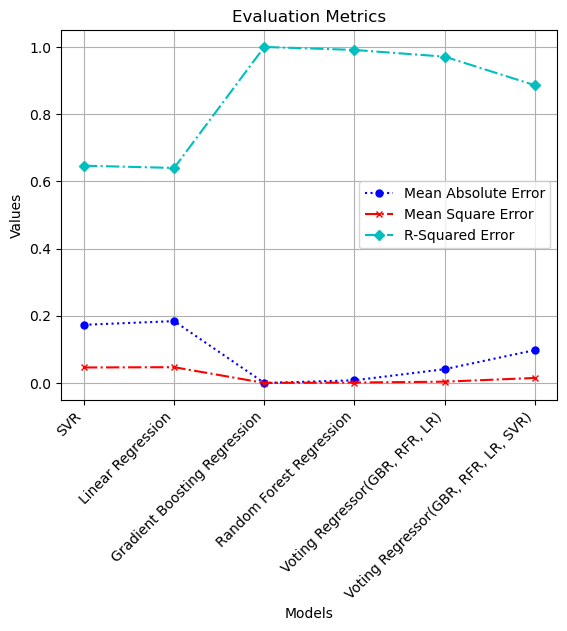

In [46]:
x = r2_score_models_dict.keys()
y = r2_score_models_dict.values()
fig, ax = plt.subplots()

ax.plot(mean_absolute_error_models_dict.keys(), mean_absolute_error_models_dict.values(), marker = 'o', ms = 5, color = 'b', label = 'Mean Absolute Error', linestyle = ':')
ax.plot(mean_squared_error_models_dict.keys(), mean_squared_error_models_dict.values(), marker = 'x', ms = 5, color = 'r', label = 'Mean Square Error', linestyle = '-.')
ax.plot(r2_score_models_dict.keys(), r2_score_models_dict.values(), marker = 'D', ms = 5, color = 'c', label = 'R-Squared Error', linestyle = '-.')
ax.legend()
ax.grid()
plt.legend()
plt.xlabel('Models')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.title('Evaluation Metrics')
plt.show()

fig.savefig('Evaluation Metrics.png', bbox_inches='tight')